In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
NUM_CITIES = 20
POP_SIZE = 100
GENERATIONS = 300
TOURNAMENT_SIZE = 5
CROSS_RATE = 0.9
MUTATE_RATE = 0.2

def create_distance_matrix(n):
    coords = np.random.rand(n, 2)
    dist = np.sqrt(((coords[:, np.newaxis] - coords[np.newaxis, :])**2).sum(axis=2))
    return dist

def path_length(path, dist_matrix):
    return sum(dist_matrix[path[i], path[(i + 1) % len(path)]] for i in range(len(path)))

def init_population():
    return [random.sample(range(NUM_CITIES), NUM_CITIES) for _ in range(POP_SIZE)]

def tournament_selection(population, fitnesses):
    selected = random.sample(list(zip(population, fitnesses)), TOURNAMENT_SIZE)
    return min(selected, key=lambda x: x[1])[0][:]

def order_crossover(parent1, parent2):
    if random.random() > CROSS_RATE:
        return parent1[:]
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child = [None] * NUM_CITIES
    child[start:end] = parent1[start:end]
    ptr = end
    for city in parent2:
        if city not in child:
            if ptr >= NUM_CITIES:
                ptr = 0
            child[ptr] = city
            ptr += 1
    return child

def mutate(path):
    if random.random() < MUTATE_RATE:
        i, j = random.sample(range(NUM_CITIES), 2)
        path[i], path[j] = path[j], path[i]
    return path

In [3]:
dist_matrix = create_distance_matrix(NUM_CITIES)
population = init_population()
best_lengths = []

for gen in range(GENERATIONS):
    fitnesses = [path_length(p, dist_matrix) for p in population]
    new_population = []

    for _ in range(POP_SIZE):
        parent1 = tournament_selection(population, fitnesses)
        parent2 = tournament_selection(population, fitnesses)
        child = order_crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population
    best = min(fitnesses)
    best_lengths.append(best)

best_index = np.argmin([path_length(p, dist_matrix) for p in population])
best_path = population[best_index]
best_distance = path_length(best_path, dist_matrix)

print(f"Лучшая длина пути: {best_distance:.2f}")
print(f"Лучший путь: {best_path}")

Лучшая длина пути: 3.58
Лучший путь: [7, 19, 18, 8, 15, 16, 12, 14, 4, 3, 13, 11, 0, 6, 10, 2, 17, 5, 1, 9]


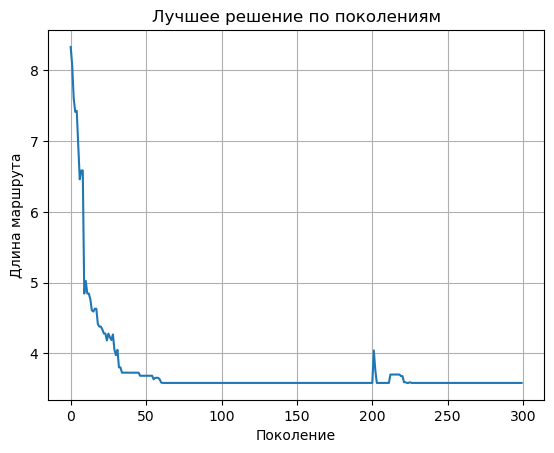

In [4]:
plt.plot(best_lengths)
plt.title("Лучшее решение по поколениям")
plt.xlabel("Поколение")
plt.ylabel("Длина маршрута")
plt.grid(True)
plt.show()